<a href="https://colab.research.google.com/github/robbi621/data-set/blob/main/Build_simple_ANN_from_Scratch_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import numpy

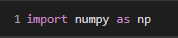

In [1]:
# TODO 1: ketikkan kode di atas pada bagian ini
import numpy as np

# Membuat Dataset

![dataset](https://miro.medium.com/max/639/1*uGmgaSPI_pv25dBugw1AZQ.png)

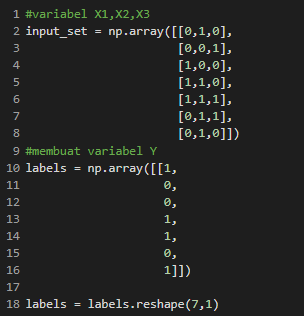

In [5]:
# TODO 2 : ketikkan kode di atas pada bagian ini
a = np.array([[0,1,0],
              [0,0,1],
              [1,0,0],
              [1,1,0],
              [1,1,1],
              [0,1,1],
              [0,1,0]])
b = np.array([[1,
               0,
               0,
               1,
               1,
               0,
               1]])
b = b.reshape(7,1)

Generate secara random nilai dari bobot dan bias

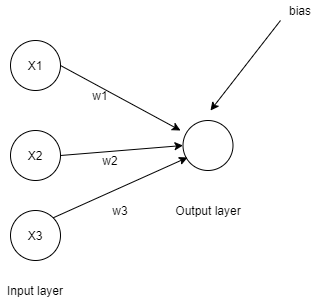



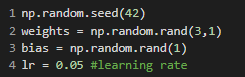

In [6]:
# TODO 3: ketikkan kode di atas pada bagian ini
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05 

In [7]:
weights

array([[0.37454012],
       [0.95071431],
       [0.73199394]])

In [8]:
bias

array([0.59865848])

# Fungsi Aktivasi

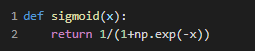

In [10]:
# TODO 4: ketikkan kode di atas pada bagian ini
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Menghitung turunan fungsi sigmoid

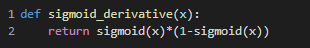

In [11]:
# TODO 5: ketikkan kode di atas pada bagian ini
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

# Langkah-langkah training ANN

Penjelasan per step dari tahap-tahap training ANN

## Feedforward

1. Feed input ke model

In [29]:
inputs = a
print(inputs)

[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 1]
 [0 1 0]]


2. Menghitung dot product antara input_set dan bobot

In [30]:
XW = np.dot(a, weights)+ bias
print(XW)

[[  5.08414633]
 [-21.54533005]
 [ -4.46730327]
 [ 13.06938065]
 [  3.97658818]
 [ -4.00864613]
 [  5.08414633]]


3. Menggunakan fungsi aktivasi (sigmoid)

Sigmoid function :
![sigmoid](https://miro.medium.com/max/271/0*Z971d29-r-SS59Z-.png)

In [37]:
z = sigmoid(XW)
print(z)

[[9.93843959e-01]
 [4.39523446e-10]
 [1.13479732e-02]
 [9.99997891e-01]
 [9.81595574e-01]
 [1.78341306e-02]
 [9.93843959e-01]]


## Backpropagation

1. Evaluasi dengan menghitung loss function

![MSE](https://miro.medium.com/max/581/0*DGjzN-ppsTBxYsFp.png)

In [38]:
error = z - b
print(error)


[[-6.15604100e-03]
 [ 4.39523446e-10]
 [ 1.13479732e-02]
 [-2.10881842e-06]
 [-1.84044264e-02]
 [ 1.78341306e-02]
 [-6.15604100e-03]]


In [39]:
print(error.sum())

-0.0015365129532939996


2. Update bobot dengan gradient descent

![gsd](https://miro.medium.com/max/414/0*RpdL_oGbesW7sQhF.png)

In [40]:
dcost = error
dpred = sigmoid_derivative(z)
z_del = dcost * dpred
inputs = a.T
weights = weights-lr*np.dot(inputs, z_del)

In [42]:
# Nilai bobot baru 
print(weights)

[[ 7.98531559]
 [17.53684582]
 [-9.09287337]]


3. Update nilai bias

In [43]:
for num in z_del:
        bias = bias - lr*num

# Nilai bias baru
print(bias)

[-12.45265937]


#Training ANN dengan epoch = 25000

Training ANN dengan Feedforward dan Backpropagation

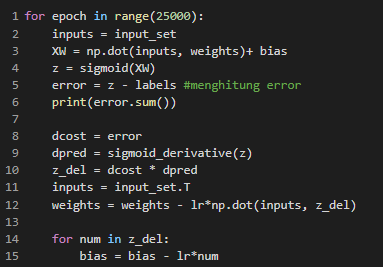

In [44]:
# TODO 6: ketikkan kode di atas pada bagian ini
for epoch in range(25000):
    inputs = a
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)
    error = z - b
    print(error.sum())
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = a.T
    weights = weights - lr*np.dot(inputs, z_del)
    
    for num in z_del:
        bias = bias - lr*num

Streaming output truncated to the last 5000 lines.
-0.001137881310427984
-0.0011378664746546623
-0.0011378516392629955
-0.0011378368042518107
-0.0011378219696219615
-0.0011378071353739822
-0.0011377923015067348
-0.0011377774680212047
-0.0011377626349167863
-0.0011377478021929645
-0.0011377329698505165
-0.001137718137889621
-0.0011377033063095145
-0.0011376884751108027
-0.0011376736442929372
-0.001137658813856036
-0.0011376439838010378
-0.0011376291541265217
-0.001137614324833041
-0.0011375994959208074
-0.001137584667389403
-0.0011375698392390877
-0.00113755501146986
-0.0011375401840818082
-0.001137525357074863
-0.0011375105304486637
-0.0011374957042035172
-0.0011374808783389308
-0.001137466052855425
-0.0011374512277532133
-0.0011374364030313118
-0.00113742157869055
-0.001137406754730421
-0.0011373919311514144
-0.0011373771079528482
-0.0011373622851360444
-0.0011373474626993497
-0.0011373326406437633
-0.0011373178189687388
-0.001137302997674122
-0.0011372881767608284
-0.0011372733562282

# Membuat Prediksi dari model yang telah dilatih

Data dengan fitur : X1 = 1, X2 = 0, X3 = 0

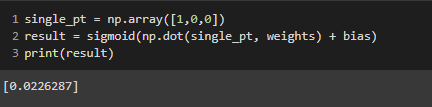

In [45]:
# TODO 7: ketikkan kode di atas pada bagian ini
single_pt = np.array([1,0,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)

[0.00755582]


Data dengan fitur : X1 = 0, X2 = 1, X3 = 0

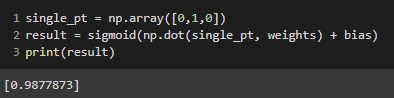

In [46]:
# TODO 8: ketikkan kode di atas pada bagian ini
single_pt = np.array([0,1,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)

[0.99589463]
